# Pandas tutorial

In [1]:
import numpy as np
import pandas as pd

## Series object

In [2]:
series_1 = pd.Series(np.array([10, 20, 30, 40]))
series_1

0    10
1    20
2    30
3    40
dtype: int32

In [3]:
series_2 = pd.Series(data=np.arange(4), index=['A', 'B', 'C', 'D'])
series_2

A    0
B    1
C    2
D    3
dtype: int32

In [4]:
series_2.values # Getting values of the series

array([0, 1, 2, 3])

In [5]:
series_2.index # Getting indices of the series

Index(['A', 'B', 'C', 'D'], dtype='object')

In [6]:
series_2['A'] # Getting the value corresponding to label(index) 'A'

0

In [7]:
series_2[['A', 'C']] # Getting the values corresponding to several labels: 'A', 'B'

A    0
C    2
dtype: int32

In [8]:
series_2[series_2 > 2] # We can do boolean conditioning 

D    3
dtype: int32

In [9]:
np.exp(series_2) # We can pass a Series object to NumPy functions

A     1.000000
B     2.718282
C     7.389056
D    20.085537
dtype: float64

In [10]:
series_2 * 4 # We can do arithmetic with Series object

A     0
B     4
C     8
D    12
dtype: int32

We can think of Series object as a dictionary since it maps an index to a value.

In [11]:
'B' in series_2

True

In [12]:
'F' in series_2

False

We can pass a dictionary to pd.Series().

In [13]:
dict_1 = {'wellness': 'Yarishna',
          'figure': 'Rebecca',
          'bodybuilding': 'Iman',
         '212': 'Shaun'}
series_2 = pd.Series(dict_1)
series_2

wellness        Yarishna
figure           Rebecca
bodybuilding        Iman
212                Shaun
dtype: object

We can override the index by changing the index explicitly. If the index already exists as a dictionary key, then we will have a value associated with it, otherwise we receive NaN.

In [14]:
pd.Series(dict_1, index=['FBB', 'Natural FBB', 'best natural', 'Giant killer'])

FBB             NaN
Natural FBB     NaN
best natural    NaN
Giant killer    NaN
dtype: object

In [15]:
series_3 = pd.Series(dict_1, index=['figure', '212', 'best natural', 'wellness'])
series_3

figure           Rebecca
212                Shaun
best natural         NaN
wellness        Yarishna
dtype: object

Finding missing values: *isnull*, *notnull* both as pandas functions and Series methods. 

In [16]:
pd.isnull(series_3)

figure          False
212             False
best natural     True
wellness        False
dtype: bool

In [17]:
pd.notnull(series_3)

figure           True
212              True
best natural    False
wellness         True
dtype: bool

In [18]:
series_3.isnull()

figure          False
212             False
best natural     True
wellness        False
dtype: bool

In [19]:
series_3.notnull()

figure           True
212              True
best natural    False
wellness         True
dtype: bool

When we perform arithmetic operations on Series objects, the objects are aligned by index.

In [20]:
series_4 = pd.Series(data=np.random.randint(1, 5, 5), index=['C', 'D', 'E', 'F', 'G'])
series_5 = pd.Series(data=np.random.randint(1, 5, 5), index=['A', 'B', 'C', 'D', 'G'])
print(series_4)
print(series_5)

C    3
D    2
E    3
F    3
G    1
dtype: int32
A    1
B    3
C    2
D    2
G    1
dtype: int32


In [21]:
series_4 + series_5

A    NaN
B    NaN
C    5.0
D    4.0
E    NaN
F    NaN
G    2.0
dtype: float64

We can change a Series index inplace:

In [22]:
series_4.index = range(5)
series_4

0    3
1    2
2    3
3    3
4    1
dtype: int32

Both Series object and its index have name attributes:

In [23]:
series_4.name = 'Example Series'
series_4.index.name = 'myInd'
print(series_4)

myInd
0    3
1    2
2    3
3    3
4    1
Name: Example Series, dtype: int32


## DataFrame

In [24]:
dataframe_1 = pd.DataFrame(data = np.random.randn(6, 3), columns=['Books', 'Pens', 'Shoes'])
dataframe_1

,Books,Pens,Shoes
0,0.897605,-0.327327,0.971786
1,-0.393532,0.961626,0.123480
2,0.499512,0.492447,0.540122
3,0.120541,-0.868138,0.354568
4,0.738193,-0.020874,0.306368
5,0.205080,0.321613,2.036782


In [25]:
dataframe_1.index = ['A', 'B', 'C', 'D', 'E', 'F'] # This is how we change the index in place
dataframe_1

,Books,Pens,Shoes
A,0.897605,-0.327327,0.971786
B,-0.393532,0.961626,0.123480
C,0.499512,0.492447,0.540122
D,0.120541,-0.868138,0.354568
E,0.738193,-0.020874,0.306368
F,0.205080,0.321613,2.036782


In [26]:
pd.DataFrame(data = np.random.randn(6, 3), columns=['Books', 'Pens', 'Shoes'], index=['A', 'B', 'C','D','E','F'])

,Books,Pens,Shoes
A,1.552978,-1.216543,-0.075854
B,-0.951889,-1.335041,-0.940417
C,0.713440,1.247843,-0.546016
D,-0.280789,0.024700,-0.386500
E,-0.771771,-1.217179,0.795600
F,-0.788823,-0.353966,0.095842


We can also pass a dictionary to pd.DataFrame to create an object.

In [27]:
dict_2 = {'A': np.arange(10), 'B': np.random.randint(1, 7, 10), 'C': np.random.randn(10)} 
print(f"Created DataFrame using dictionary:\n{pd.DataFrame(dict_2)}") # Automatically assigns the index
print(f"\nCreated DataFrame by specifying the index:\n{pd.DataFrame(dict_2, index=list('EFGHIGKLMN'))}") # We can pass the index like this.


Created DataFrame using dictionary:
   A  B         C
0  0  6 -0.219076
1  1  6 -2.564587
2  2  4  0.628099
3  3  5  0.190485
4  4  3  0.049223
5  5  3 -0.190953
6  6  2  2.152835
7  7  3 -1.163424
8  8  6  0.553983
9  9  5 -1.060710

Created DataFrame by specifying the index:
   A  B         C
E  0  6 -0.219076
F  1  6 -2.564587
G  2  4  0.628099
H  3  5  0.190485
I  4  3  0.049223
G  5  3 -0.190953
K  6  2  2.152835
L  7  3 -1.163424
M  8  6  0.553983
N  9  5 -1.060710


In [28]:
pd.DataFrame(dict_2).head() # head() method shows the first 5 rows of a DataFrame.

,A,B,C
0,0,6,-0.219076
1,1,6,-2.564587
2,2,4,0.628099
3,3,5,0.190485
4,4,3,0.049223


In [29]:
pd.DataFrame(dict_2, columns=['B', 'C', 'A']) # Rearranging the columns

,B,C,A
0,6,-0.219076,0
1,6,-2.564587,1
2,4,0.628099,2
3,5,0.190485,3
4,3,0.049223,4
5,3,-0.190953,5
6,2,2.152835,6
7,3,-1.163424,7
8,6,0.553983,8
9,5,-1.060710,9


In [30]:
pd.DataFrame(dict_2, columns=['A', 'B', 'C', 'D']) # Here, we don't have a key 'D' in dict_2. 
#Including 'D' in the columns will add that column and assigns NaN values to it.

,A,B,C,D
0,0,6,-0.219076,NaN
1,1,6,-2.564587,NaN
2,2,4,0.628099,NaN
3,3,5,0.190485,NaN
4,4,3,0.049223,NaN
5,5,3,-0.190953,NaN
6,6,2,2.152835,NaN
7,7,3,-1.163424,NaN
8,8,6,0.553983,NaN
9,9,5,-1.060710,NaN


Retrieving a column:

Either use dictionary notation or attribute: df['columnName'] or df.columnName

In [31]:
dataframe_1['Pens']

A   -0.327327
B    0.961626
C    0.492447
D   -0.868138
E   -0.020874
F    0.321613
Name: Pens, dtype: float64

In [32]:
dataframe_1.Pens

A   -0.327327
B    0.961626
C    0.492447
D   -0.868138
E   -0.020874
F    0.321613
Name: Pens, dtype: float64

Note that dictionary notation for getting a column works with any column name, but using attribute only works if the columnName is a valued Python variable name.

In [33]:
dataframe_1.columns

Index(['Books', 'Pens', 'Shoes'], dtype='object')

In [34]:
dataframe_1.columns = ['Books', 'Pens', 1]
dataframe_1

,Books,Pens,1
A,0.897605,-0.327327,0.971786
B,-0.393532,0.961626,0.123480
C,0.499512,0.492447,0.540122
D,0.120541,-0.868138,0.354568
E,0.738193,-0.020874,0.306368
F,0.205080,0.321613,2.036782


In [35]:
dataframe_1[1]

A    0.971786
B    0.123480
C    0.540122
D    0.354568
E    0.306368
F    2.036782
Name: 1, dtype: float64

In [36]:
dataframe_1.1 # We cannot retrieve column corresponding to 1!

SyntaxError: invalid syntax (492237829.py, line 1)

In [ ]:
print(dataframe_1)
dataframe_1.loc['C'] # retrieves row with index 'C'

In [ ]:
dataframe_1.iloc[2] # retrieves row number 3

In [ ]:
dataframe_2 = pd.DataFrame(dict_2, columns=['A', 'B', 'C', 'D'])
print(dataframe_2)
dataframe_2['D'] = 2
print(dataframe_2)

In [ ]:
dataframe_2['D'] = np.random.randn(10,1) # length of the assigned vector should match the number of rows in DF.
dataframe_2

In [ ]:
series_6 = pd.Series(np.random.randint(1,5,10), index=np.arange(4, 14)) # 
dataframe_2 ['D'] = series_6 # When assigning a Series to a DF column, index are aligned.
dataframe_2

In [ ]:
del dataframe_2['D'] # del keyword deletes a column
dataframe_2

In [ ]:
dataframe_1 = pd.DataFrame(np.random.randn(6,3), columns=['Books', 'Pens', 'Shoes'])
print(dataframe_1)
book = dataframe_1['Books']
book = 1
print(dataframe_1)

In [ ]:
dataframe_1.columns.name = 'Commodity' # Setting name of the columns to be 'commodity'
dataframe_1.index.name = 'rows' # Setting name of the index to be 'rows'
dataframe_1

We can pass a nested dictionary to pd.DataFrame(). So basically, a dict of dict. 

In [ ]:
dictOfDict_1 = {'Column1': {'ind1': 1, 'ind2': 2, 'ind3': 3},
              'Column2': {'ind1': 4, 'ind2': 5, 'ind3': 6},
              'Column3': {'ind1': 7, 'ind2': 8, 'ind3': 9}} 
pd.DataFrame(dictOfDict_1)
# The outer keys are regarded as Column names.

In [ ]:
pd.DataFrame(dictOfDict_1, index=['ind2', 'ind3', 'ind4']) # Here we override the indexes. Notice the NaN values.

We can also pass a dict of Series:

In [ ]:
dictOfSeries_1 = {'cost': dataframe_2['A'],
                  'tax': dataframe_2['B'],
                  'income': dataframe_2['C']}
pd.DataFrame(dictOfSeries_1)
# index of Series is used as the index of the built DataFrame.

Some hotKey for Jupyter notebook: if you want to create an empy cell after a cell, press B. A cell before the current cell, press A.

In [ ]:
dataframe_2.values # Getting values of the DataFrame

In [ ]:
series_3.values # Getting values of the Series

In [ ]:
print(dataframe_2['B'].value_counts()) # Counting number of times each element in the column 'B' is repeated.
print(dataframe_2)

We can transpose a DataFrame:

In [ ]:
dataframe_1.T

### reindexing: 

In [ ]:
dataframe_3 = pd.DataFrame(data=np.random.randn(7, 5), columns=list('ABCDE'),
                           index=range(7))
dataframe_3

In [ ]:
dataframe_4 = dataframe_3.reindex(index=[1, 2, 8, 6, 7])
dataframe_4 # values corresponding to the indices that don't exist in the original DF will be NaN.

In [ ]:
dataframe_3.reindex(index=[1, 2, 8, 6, 7], method='ffill') # we can fill in NaN values using method.
# Here, the method is forward fill.

We can reindex columns as well. If we only pass one list, then we are changing the index. 

In [ ]:
dataframe_3.reindex(index=[1, 2, 8, 6, 7], columns=['A', 'C', 'E'])

### Dropping entries from axes

In [ ]:
obj = pd.DataFrame(data=np.arange(12).reshape(3, 4), columns=list('ABCD'))
obj

In [ ]:
obj.drop(1) # This drops the row with index 1. 

In [ ]:
print(obj) # you can see that by calling the drop method, obj did not change. We can however make the change
# to be in place
obj.drop(2, inplace=True)
print(f"The new obj is \n{obj}")

We can also drop columns. For this, we should write axis = 1 or axis = 'columns'

In [ ]:
obj = pd.DataFrame(data=np.arange(12).reshape(3, 4), columns=list('ABCD'))
obj.drop(['A', 'B'], axis = 1)

In [ ]:
obj.drop('C', axis = 'columns')

### Indexing

In [ ]:
obj_s = pd.Series(np.arange(3, 7), index=list('QWER'))
obj_s

In [ ]:
obj_s[1]

In [ ]:
obj_s[0:2]

In [ ]:
obj_s[['W', 'R']]

In [ ]:
obj_s[obj_s > 3]

In [ ]:
obj_s['Q': 'E'] # Note that this way of slicing with indexes is inclusive of the end-point.

In [ ]:
obj_s['Q': 'E'] = np.array([7, 8, 9]) # This will change obj_s in place
obj_s 

Operation on DF:

Let's try this on DataFrame. It is not exactly the same because when we write df[x], it returns column, not row. To return row(s), we should use the slicing notation ":".

In [ ]:
obj.index = list('ghj')
obj

In [ ]:
obj[1:2] # if you pass obj[1], you will get an error! Note that obj[] returns column(s), but slicing like the 
#one here works to return rows.

In [ ]:
obj[0:2]

Some operations on DF:

In [ ]:
print(obj)
obj > 5

In [ ]:
obj[obj > 5] = 10

In [ ]:
obj

Selection with loc and iloc:

In [ ]:
print(dataframe_4)
dataframe_4.loc[[2, 6], ['A', 'B']] # loc can be used to access particular cut of the DF. 
# it is basically a way of reindexing.

In [ ]:
dataframe_4.iloc[0, 1]

In [ ]:
dataframe_1

In [ ]:
dataframe_1[dataframe_1['Books'] > 0]

In [ ]:
dataframe_1

In [ ]:
dataframe_1.iloc[1, 1]

In [ ]:
dataframe_1.iat[1, 1]

Integer indexes

In [ ]:
series_3

In [ ]:
series_3[0]

In [ ]:
series_3['figure']

In [ ]:
series_3[-1]

Consider a Series with integer indexes. This can cause an error with previous syntax as it creates confusion:

In [ ]:
series_1

In [ ]:
series_1[-1] # This causes confusion as indexes are integers.

In [ ]:
series_1[2]

In [ ]:
series_1.iloc[-1] # This one works pretty well. Use loc with labels, and iloc for integer indexing.

In [ ]:
print(series_2)
print()
print(series_2['figure':])

In [ ]:
series_2.iloc[1:] # The same as above

In [ ]:
series_1[0:1]

In [ ]:
series_1.loc[0:1] # This includes the end-point.

In [ ]:
series_1.iloc[0:1]

In [ ]:
dataframe_1.loc['B':'D', 'Books': 1] # Notice that for DF as well, .loc[] includes the end point.

### Arithmetic and Data Alignment
arithmetic operation between objects that have different indexes returns objects with union of the indexes. 

In [ ]:
s1 = pd.Series(data=np.arange(5), index=list('ABCDE'))
s2 = pd.Series(data=np.random.randn(3), index=list('DAF'))
print(s1)
print(s2)

In [ ]:
s1 + s2

For DataFrame, the alignment is performed on both index and label (row and column)

In [ ]:
dataframe_1

In [ ]:
dataframe_2 = pd.DataFrame(np.random.randn(6, 2), index = list('DCBHIJ'), columns=['Books', 1])
print(dataframe_2)

In [ ]:
dataframe_1 + dataframe_2

### Arithmetic methods with fill values
When performing arithmetic with DFs, if one axis label (or index) exists in one but not in the other DF, then we can specify a fill value to be considered for the DF that does not have that particular index (or label). Note that for the operation to not yield NaN for a particular (index, column), either the index or column should exist in both DataFrames.

In [ ]:
df_1 = pd.DataFrame(np.random.rand(2, 3), list('AB'), columns = list('123'))
df_1

In [ ]:
df_2 = pd.DataFrame(np.random.randn(3, 3), list('ABC'), list('234'))
df_2

In [ ]:
df_1 + df_2

In [ ]:
df_1.add(df_2, fill_value=5) # The value corresponding to (index='C', column=1) is NaN since neither of the dataframes have this element.

In [ ]:
df_2.add(df_1, fill_value=5)

In [ ]:
df_1.div(1)

In [ ]:
df_1.rdiv(1) # rdiv reverese the order of division. 

### Operations between DF and Series
let's look at NumPy. By default the operation is performed for each row. This called *broadcasting*.

In [ ]:
arr = np.arange(12).reshape(3, 4)
arr

In [ ]:
arr - arr[0]

Let's do the same to DF and Series

In [ ]:
dataframe_1

In [ ]:
dataframe_1.loc['A']

In [ ]:
dataframe_1 - dataframe_1.loc['A']

By default, the operation between a DF and Series matches the index of the Series with DF columns.

We can also do the operation along DF index. In this case, we should use arithmetic methods:

In [ ]:
dataframe_1.sub(dataframe_1['Books'], axis=0) # The number of axis we pass corresponds to the axis we want to match on.

## Function application and mapping

We can apply ufunc functions of NumPy to DF and Series:

In [ ]:
np.exp(dataframe_1)

We can apply functions of one-dimensional arrays to each row or column of a DF.

In [ ]:
f = lambda x: x.max() - x.min()
dataframe_1

In [ ]:
dataframe_1.apply(f)

If you want to apply the function to rows, set axis='columns'

In [ ]:
dataframe_1.apply(f, axis='columns')

The function we apply to DF need not return a scaler. It can be a Series for instance:

In [ ]:
f2 = lambda x: pd.Series([x.min(), x.max()], index = ['x_min', 'x_max'])

In [ ]:
dataframe_1.apply(f2)

Now let's apply a function to elements of DF, instead of applying it to row or column. For this, use the applymap method. The reason for this naming convention is that for Series, we have a map method.

In [ ]:
f3 = lambda x: x + np.sin(x)

In [ ]:
dataframe_1.applymap(f3)

For Series, we have the map method:

In [ ]:
series_1

In [ ]:
series_1.map(f3)

In [ ]:
x = list(range(4))
y = list(range(5,10))
print(x)
print(y)

In [ ]:
x.extend(y)
print(f"x is extended to be {x}")

Diverging from subject here. Interesting string formatting in Python:

In [ ]:
float1 = 2.154327
float2 = 3.44444
format_float = "The value is {0} and the second value is {1}".format(float1, float2)
print(format_float)
format_float2 = "The value is {0:.2f} and the second value is {1:0.2f}".format(float1, float2) # This is how we can specify 
#how many float decimals places we want.
print(format_float2)
format_float3 = "The value is {:.2f} and the second value is {:0.2f}".format(float1, float2)
print(format_float3) # Here you can see that we could do it without putting the placeholders 0 and 1.
format_float4 = "The value is {1:.2f} and the second value is {0:0.2f}".format(float1, float2)
print(format_float4) # This reverses the order of numbers.

### Sorting and ranking

We can sort Series and DF by either index or values:

sort_index method -> sorting by index (we can specify axis also)

sort_values method -> sorting by values (we can pass multiple columns based on which we sort)

In [ ]:
series_6 = pd.Series([10, 30, 50, 40], index=[4, 3, 1, 2])
series_6

In [ ]:
series_6.sort_index()

In [ ]:
series_6.sort_values() # missing values go to the end.

Let's look at DF:

In [ ]:
dataframe_2 = pd.DataFrame(np.random.randint(3, 6, (4, 3)), index = list('1432'), columns=list('BAC'))
dataframe_2

In [ ]:
dataframe_2.sort_index()

In [ ]:
dataframe_2.sort_index(axis='columns')

In [ ]:
dataframe_2.sort_values(by='C') # Sorting by column 'C'

In [ ]:
dataframe_2.sort_values(by=['C', 'B']) # Sorting by first column 'C', and then sorting with respect to column 'B'

We can also sort in descending manner (the default is ascending):

In [ ]:
dataframe_2.sort_index()

In [ ]:
dataframe_2.sort_index(ascending=False) # Descending

### Ranking

We can assign ranks to data in array from one (1) to the number of valid data points. We basically assign to each value in array, a rank value that shows where it stands compared to the other values in the array. This can be both ascending or descending.

In [ ]:
series_6

In [ ]:
series_6.rank()

In [ ]:
series_6.rank(ascending=False)

When we have duplicates of elements, we can change the way we rank them.

In [ ]:
series_7 = pd.Series(np.random.randint(2,6, 8))
series_7

In [ ]:
series_7.rank() #we have two 2's. The default ranking system is to assign to them the average of ranks 1, 2 (since they are
#the smallest values so they have ranks 1, 2). 
#we have two 4's also. They are assigned the rank (4+5)/2 =4.5.

We can change the method by which we rank:

In [ ]:
series_7.rank(method='first') # Elements are ranked based on which is first spotted in the array. For example, we have two 2's
#The one corresponding to the index 4 is appeared first so it will take rank 1. Here, we are not averaging. The default method
# is method = 'average'

In [ ]:
series_7.rank(method='min') # using the minimum rank for the whole group. Notice the ranks for index 4 and 5 where the elements
#are 2.

In [ ]:
series_7.rank(method='max') # using the maximum rank for the whole group

In [ ]:
series_7.rank(method='dense') # if you notice the output of method='min', there is no rank=2. To not skip any rank when counting,
#we can use the method 'dense'. It is similar to 'min', but ranks always increase by 1 between groups.

### Axis indexes with duplicate labels

In [ ]:
series_8 = pd.Series(np.arange(8), index=list('AABBCCDD'))
series_8

In [ ]:
series_8['B']# this returns all the values corresponding to index 'B'

In [ ]:
series_8.index.is_unique # This shows if we have duplicates in index

The same goes for DataFrame:

In [ ]:
dataframe_3 = pd.DataFrame(np.arange(12).reshape(3, 4), index = list('AAB'), columns= ['C', 'C', 'D', 'E'])

In [ ]:
dataframe_3

In [ ]:
dataframe_3.index.is_unique

In [ ]:
dataframe_3.columns.is_unique

In [ ]:
dataframe_3.loc['A', 'C']

## Summarizing and computing descriptive statistics

In [ ]:
dataframe_4 = pd.DataFrame([[1, 3, np.nan], [np.nan, 12, 8], [0, np.nan, 5]])
dataframe_4

In [ ]:
dataframe_4.describe()

In [ ]:
dataframe_4.sum() # nan values are ignored unless the whole row (or column) consists of nan.

In [ ]:
dataframe_4.mean()

In [ ]:
dataframe_4.sum(axis='columns') # Specifying in which direction we want to apply the sum method.

We can take NaN values into account by setting skipna = flase

In [ ]:
dataframe_4.sum(skipna=False) # nan values are ignored unless the whole row (or column) consists of nan.

We can find where is the location of maximum or minimum value in row/column.

In [ ]:
dataframe_1

In [ ]:
dataframe_1.idxmax()

In [ ]:
dataframe_1.idxmax(axis=1)

In [ ]:
dataframe_1.idxmin() # minimum index location.

Other methods:

In [ ]:
dataframe_1.cumsum()

In [ ]:
dataframe_1.cumprod()

In [ ]:
dataframe_1.cumprod(axis=1) # we can determine the axis also.

In [ ]:
dataframe_4

In [ ]:
dataframe_4.cumsum()

In [ ]:
dataframe_4.head(2) # looking at the first two rows. If we don't specify the input argument to .head(), it is 5 by default.

In [ ]:
obj = pd.DataFrame(np.random.randn(10, 9))
obj

In [ ]:
obj.tail() # shows the last 5 rows.

What happends if we execute .describe method for a DF that includes non-numerical values?

In [ ]:
dataframe_5 = pd.DataFrame([list('ABCD'), list('EFGH'), list('IJKL')])
dataframe_5

In [ ]:
dataframe_5.describe()

## Correlation and covariance

To find correlation/vairance between two Series (or columns of DF), use *corr/cov* methods.

In [ ]:
dataframe_1

In [ ]:
dataframe_1['Books'].corr(dataframe_1['Pens']) #Correlation between two columns

In [ ]:
dataframe_1['Books'].cov(dataframe_1['Pens']) #covariance between two Columns (Series)

In [ ]:
dataframe_1.cov() #covariance between columns

In [ ]:
dataframe_1.corr() #correlation between columns

To find correlation between a DF and something else, use *corrwith* method.

In [ ]:
dataframe_1.corrwith(dataframe_1.Books) # Correlation with a column (Series)

In [ ]:
dataframe_1.corrwith(dataframe_1 + np.random.randn(dataframe_1.index.size, dataframe_1.columns.size)) # Correlation with another
#DF. In here, correlation is performed by matching column names.

In [ ]:
dataframe_1.corrwith(dataframe_1 + np.random.randn(dataframe_1.index.size, dataframe_1.columns.size), axis='columns') 
# Does things row-by-row.

In [38]:
dataframe_1

,Books,Pens,1
A,0.897605,-0.327327,0.971786
B,-0.393532,0.961626,0.123480
C,0.499512,0.492447,0.540122
D,0.120541,-0.868138,0.354568
E,0.738193,-0.020874,0.306368
F,0.205080,0.321613,2.036782


### Unique values, value counts, and memberships

In [55]:
obj = pd.Series(np.random.randint(3, 8, 10))
obj

0    3
1    3
2    3
3    6
4    5
5    3
6    4
7    3
8    4
9    3
dtype: int32

In [56]:
obj.unique()

array([3, 6, 5, 4])

In [57]:
obj.value_counts()

3    6
4    2
6    1
5    1
dtype: int64

In [59]:
obj.value_counts(sort = False)

3    6
6    1
5    1
4    2
dtype: int64

We can also count values using Pandas function -> pd.value_counts

In [61]:
pd.value_counts(obj)

3    6
4    2
6    1
5    1
dtype: int64

In [62]:
obj.isin([3, 1, 10])

0     True
1     True
2     True
3    False
4    False
5     True
6    False
7     True
8    False
9     True
dtype: bool

In [63]:
obj.isin(['Alamdar', 'Hello'])

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

*get_indexer* method is a method of the Pandas **Index** object:

In [73]:
pd.Index([1, 4, 5]).get_indexer(obj) # What does it do? It matches the index object [1, 4, 5] to obj. For each element in obj,
#it returns the index of the element in [1, 4, 5] that matches that element.

array([-1, -1, -1, -1,  2, -1,  1, -1,  1, -1], dtype=int64)

In [74]:
pd.Index(pd.Series(range(8))).get_indexer(obj)

array([3, 3, 3, 6, 5, 3, 4, 3, 4, 3], dtype=int64)

Apply value_counts function to DF:

In [79]:
df3 = pd.DataFrame(np.arange(1, 13).reshape(4, 3))

In [82]:
df3.apply(pd.value_counts).fillna(0)

,0,1,2
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0
5,0.0,1.0,0.0
6,0.0,0.0,1.0
7,1.0,0.0,0.0
8,0.0,1.0,0.0
9,0.0,0.0,1.0
10,1.0,0.0,0.0


Pandas groupby:

In [83]:
technologies   = ({
    'Courses':["Spark","PySpark","Hadoop","Python","Pandas","Hadoop","Spark","Python"],
    'Fee' :[22000,25000,23000,24000,26000,25000,25000,22000],
    'Duration':['30days','50days','35days','40days','60days','35days','55days','50days'],
    'Discount':[1000,2300,1000,1200,2500,1300,1400,1600]
                })
df = pd.DataFrame(technologies, columns=['Courses','Fee','Duration','Discount'])
print(df)


   Courses    Fee Duration  Discount
0    Spark  22000   30days      1000
1  PySpark  25000   50days      2300
2   Hadoop  23000   35days      1000
3   Python  24000   40days      1200
4   Pandas  26000   60days      2500
5   Hadoop  25000   35days      1300
6    Spark  25000   55days      1400
7   Python  22000   50days      1600


In [94]:
df.groupby(['Duration']).mean()

,Fee,Discount
Duration,,
30days,22000.0,1000.0
35days,24000.0,1150.0
40days,24000.0,1200.0
50days,23500.0,1950.0
55days,25000.0,1400.0
60days,26000.0,2500.0


In [107]:
df['Fee'].count()

8

In [96]:
df.groupby(['Courses','Duration'])['Fee'].count()

Courses  Duration
Hadoop   35days      2
Pandas   60days      1
PySpark  50days      1
Python   40days      1
         50days      1
Spark    30days      1
         55days      1
Name: Fee, dtype: int64

In [106]:
df.groupby(['Courses','Duration'])['Fee'].agg('count')

Courses  Duration
Hadoop   35days      2
Pandas   60days      1
PySpark  50days      1
Python   40days      1
         50days      1
Spark    30days      1
         55days      1
Name: Fee, dtype: int64

In [98]:
df.groupby(['Courses','Duration'])['Fee'].agg('count').reset_index()

,Courses,Duration,Fee
0,Hadoop,35days,2
1,Pandas,60days,1
2,PySpark,50days,1
3,Python,40days,1
4,Python,50days,1
5,Spark,30days,1
6,Spark,55days,1


In [114]:
dataframe_1.agg('count')

Books    6
Pens     6
1        6
dtype: int64

## Cut function:

In [120]:
df['Fee_range'] = pd.cut(df['Fee'], bins = [21000, 22100, 23000, 30000], labels=('cheap', 'moderate', 'expensive'))
df

,Courses,Fee,Duration,Discount,Fee_range
0,Spark,22000,30days,1000,cheap
1,PySpark,25000,50days,2300,expensive
2,Hadoop,23000,35days,1000,moderate
3,Python,24000,40days,1200,expensive
4,Pandas,26000,60days,2500,expensive
5,Hadoop,25000,35days,1300,expensive
6,Spark,25000,55days,1400,expensive
7,Python,22000,50days,1600,cheap


In [119]:
df['Fee_range'] = pd.cut(df['Fee'], bins = 3, labels=('cheap', 'moderate', 'expensive'))
df

,Courses,Fee,Duration,Discount,Fee_range
0,Spark,22000,30days,1000,cheap
1,PySpark,25000,50days,2300,expensive
2,Hadoop,23000,35days,1000,cheap
3,Python,24000,40days,1200,moderate
4,Pandas,26000,60days,2500,expensive
5,Hadoop,25000,35days,1300,expensive
6,Spark,25000,55days,1400,expensive
7,Python,22000,50days,1600,cheap


In [ ]:
dict1 = {'color':['red', 'blue', 'green'], 'price': [10, 23, 34]}
myDF = pd.DataFrame(dict1, index=['A', 'B', 'C'])
myDF

In [ ]:
dict_5 = {'Store': [1, 2, 1, 2], 'Flavor': ['Choc', 'Van', 'Straw', 'Choc'], 'Sales': [26, 12, 18, 22]}
df_5 = pd.DataFrame(dict_5)
df_5

In [ ]:
byStore = df_5.groupby('Store')
byStore.mean()

In [ ]:
byStore.sum().loc[1]

In [ ]:
byStore.describe()

#When you enter the parantheses you can press shift + tab to know the keys you can set. very informative.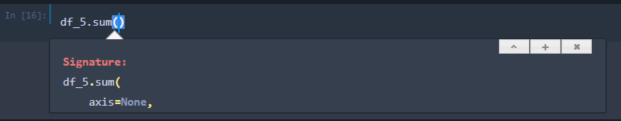

In [ ]:
df_5.sum()

In [ ]:
df_5.describe()

In [ ]:
df_5

In [ ]:
df_5['Sales'].apply(np.sqrt)

In [ ]:
series1 = pd.Series(('iman', 'Shafikhani'), index = ['First name', 'Last name'])
series1

In [ ]:
df_1 = pd.DataFrame({'Contact': ['Iman Shafikhani', 'Mohammad Binaei']})
df_1

In [ ]:
def split_names(df):
    def get_names(full_name):
        f_name, l_name = full_name.split()
        return pd.Series(
        (f_name, l_name),
        index = ['First name', 'Last name'])
    names = df['Contact'].apply(get_names)
    df[names.columns] = names
    return df

In [ ]:
    def get_names(full_name):
        f_name, l_name = full_name.split()
        return pd.Series(
        (f_name, l_name),
        index = ['First name', 'Last name'])

In [ ]:
names = df_1['Contact'].apply(get_names)
names

In [ ]:
names.columns

In [ ]:
df_1[names.columns] = names

In [ ]:
df_1